In [3]:
import os
import nibabel as nib
import pandas as pd
from tqdm import tqdm

# === CONFIGURATION ===
raw_images_dir = "/mnt/m2ssd/research project/Lightweight 3D Vision Transformers for Medical Imaging/dataset/Brats20172/Brats2017/imagesTr"
labels_dir = "/mnt/m2ssd/research project/Lightweight 3D Vision Transformers for Medical Imaging/dataset/Brats20172/Brats2017/labelsTr"
output_root = "/mnt/m2ssd/research project/Lightweight 3D Vision Transformers for Medical Imaging/dataset/BRATS_SPLIT3"
train_csv = "/mnt/m2ssd/research project/Lightweight 3D Vision Transformers for Medical Imaging/implemented ones/SegFormer3D/data/brats2017_seg/train.csv"
val_csv = "/mnt/m2ssd/research project/Lightweight 3D Vision Transformers for Medical Imaging/implemented ones/SegFormer3D/data/brats2017_seg/validation.csv"

modalities = ["flair", "t1", "t1ce", "t2"]

# === Load case names ===
train_cases = pd.read_csv(train_csv)["case_name"].tolist()
val_cases = pd.read_csv(val_csv)["case_name"].tolist()

def process_case(case_id, dest_root):
    case_dir = os.path.join(dest_root, case_id)
    os.makedirs(case_dir, exist_ok=True)

    # Extract and save 4 modalities
    for idx, modality in enumerate(modalities):
        file_path = os.path.join(raw_images_dir, f"{case_id}_000{idx}.nii.gz")
        if not os.path.exists(file_path):
            print(f"❌ Missing modality: {file_path}")
            continue
        img = nib.load(file_path)
        if img.shape != (240, 240, 155):
            print(f"⚠️ Skipping {case_id} — unexpected shape {img.shape}")
            return
        nib.save(img, os.path.join(case_dir, f"{case_id}_{modality}.nii"))

    # Extract and save label
    label_path = os.path.join(labels_dir, f"{case_id}.nii.gz")
    if os.path.exists(label_path):
        label_img = nib.load(label_path)
        nib.save(label_img, os.path.join(case_dir, f"{case_id}_seg.nii"))
    else:
        print(f"❌ Missing label for {case_id}")

# === Process all cases ===
print("📦 Processing training set...")
for case in tqdm(train_cases):
    process_case(case, os.path.join(output_root, "train"))

print("📦 Processing validation set...")
for case in tqdm(val_cases):
    process_case(case, os.path.join(output_root, "val"))

print("✅ Dataset prepared at:", output_root)


📦 Processing training set...


100%|██████████| 411/411 [10:38<00:00,  1.55s/it]


📦 Processing validation set...


100%|██████████| 73/73 [01:52<00:00,  1.54s/it]

✅ Dataset prepared at: /mnt/m2ssd/research project/Lightweight 3D Vision Transformers for Medical Imaging/dataset/BRATS_SPLIT3


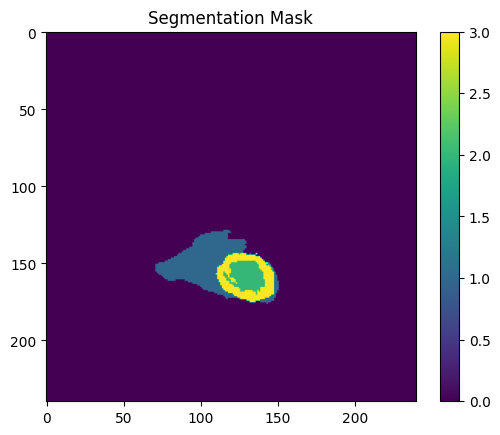

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the label
label_nii = nib.load("/mnt/m2ssd/research project/Lightweight 3D Vision Transformers for Medical Imaging/dataset/BRATS_SPLIT/train/BRATS_001/BRATS_001_seg.nii")
label_data = label_nii.get_fdata()

# Visualize a mid slice
plt.imshow(label_data[:, :, label_data.shape[2] // 2])
plt.title("Segmentation Mask")
plt.colorbar()
plt.show()
